In [7]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [9]:
save_dir = "/cluster/home/kamara/conceptx"

dataset = "alpaca"
model_name = "gpt2"
seed_ = 0

In [10]:
folder_path = os.path.join(save_dir, f"results/faithfulness/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['faithfulness', 'batch', '2', 'alpaca', 'gpt2', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gpt2/alpaca/tokenshap/seed_0/faithfulness_batch_2_alpaca_gpt2_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '0', 'alpaca', 'gpt2', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gpt2/alpaca/tokenshap/seed_0/faithfulness_batch_0_alpaca_gpt2_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '4', 'alpaca', 'gpt2', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gpt2/alpaca/tokenshap/seed_0/faithfulness_batch_4_alpaca_gpt2_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'alpaca', 'gpt2', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gpt2/alpaca/tokenshap/seed_0/faithfulness_batch_1_alpaca_gpt2_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '3', 'alpaca', 'gpt2', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/resu

,id,instruction,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed
0,528,Find the temperature of boiling water at sea l...,0.207884,0.207125,0.007757,0.050132,0.021939,0.256281,0.065700,0.281434,0.143677,-0.007820,0.116090,alpaca,gpt2,tokenshap,None,0
1,531,Outline a strategy for increasing website traf...,0.060761,0.079246,-0.100687,0.368151,0.080848,0.190487,0.110706,0.064423,0.073017,0.028370,0.106206,alpaca,gpt2,tokenshap,None,0
2,532,Make a list of four styles of furniture.,0.171678,-0.069676,0.073479,0.069178,0.097302,0.032485,0.139586,0.248200,0.335615,0.136021,0.086210,alpaca,gpt2,tokenshap,None,0
3,533,List four strategies for teaching children to ...,0.130758,0.023478,0.045426,0.251602,0.080828,0.242370,0.180659,0.311406,0.412810,0.146153,0.156580,alpaca,gpt2,tokenshap,None,0
4,534,Compute the derivative of 2x^2 + 5x.,0.022587,0.130778,0.059509,0.037039,0.071257,0.064358,0.074527,0.271472,0.202677,0.170030,0.443791,alpaca,gpt2,tokenshap,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1462,What is the primary color of a peacock?,0.070596,0.094458,0.196468,-0.005041,0.173203,0.048794,0.088390,0.047245,0.173524,0.220927,0.228451,alpaca,gpt2,conceptshap,None,0
1473,1463,Write a funny joke suitable for a PG-13 audience.,-0.073803,0.035601,0.103427,0.329842,0.156332,0.037834,0.208944,0.353004,0.049265,-0.002750,0.098688,alpaca,gpt2,conceptshap,None,0
1474,1466,Create a 'How to' guide on baking a cake.,-0.017791,0.080037,-0.013986,0.193603,-0.029146,0.056054,0.096254,0.117305,0.220184,0.352560,0.193484,alpaca,gpt2,conceptshap,None,0
1475,1469,"Evaluate the expression ""2x+7"" for x=2.",0.100599,0.088760,0.064468,0.041506,0.330851,0.119409,0.447882,0.147830,0.153798,0.185130,0.317941,alpaca,gpt2,conceptshap,None,0


In [11]:
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "concept": "_c"}).fillna("")

In [12]:
explainer_map = {'conceptshap': 'ConceptX', 'conceptshap_r': 'ConceptX-R', 'conceptshap_c': 'ConceptX-C', 'conceptshap': 'ConceptX', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-C": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptX"]


Empty DataFrame
Columns: [id, instruction, sim_0.0, sim_0.1, sim_0.2, sim_0.3, sim_0.4, sim_0.5, sim_0.6, sim_0.7, sim_0.8, sim_0.9, sim_1.0, dataset, model, explainer, baseline, seed]
Index: []
        id                                        instruction   sim_0.0  \
0      528  Find the temperature of boiling water at sea l...  0.207884   
1      531  Outline a strategy for increasing website traf...  0.060761   
2      532           Make a list of four styles of furniture.  0.171678   
3      533  List four strategies for teaching children to ...  0.130758   
4      534               Compute the derivative of 2x^2 + 5x.  0.022587   
...    ...                                                ...       ...   
1472  1462            What is the primary color of a peacock?  0.070596   
1473  1463  Write a funny joke suitable for a PG-13 audience. -0.073803   
1474  1466          Create a 'How to' guide on baking a cake. -0.017791   
1475  1469            Evaluate the expression "2x+7" fo

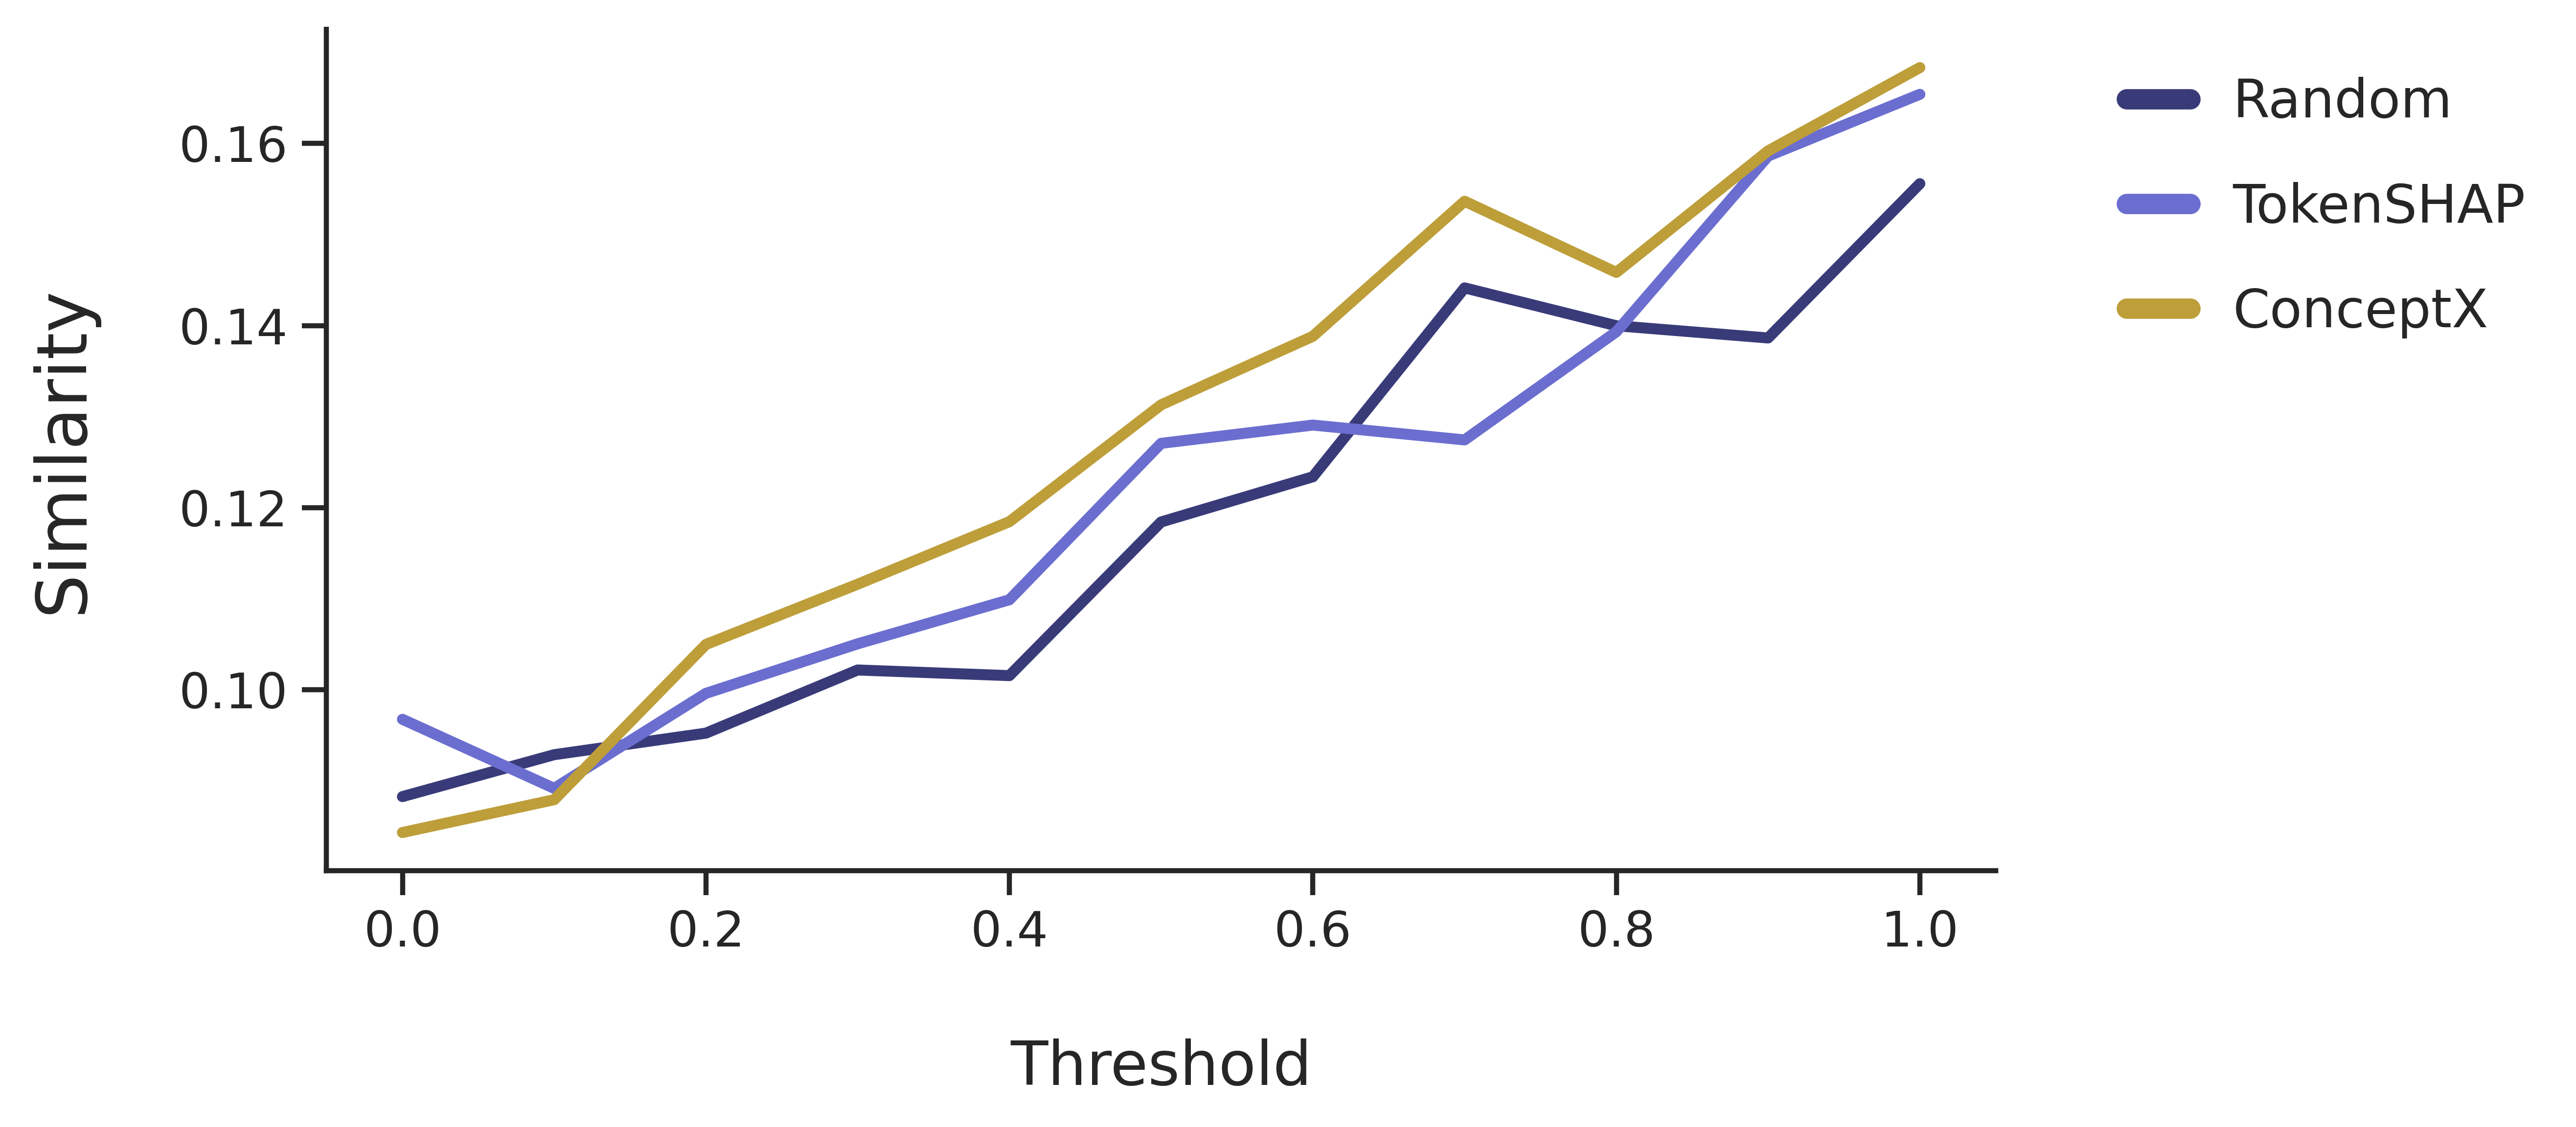

In [13]:
df = df_all


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
print(df[df["explainer"]=="ConceptX-R"])


# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "instruction", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=20)  # Increase space between axis label and ticks
plt.ylabel('Similarity', fontsize=17, labelpad=20)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
ordered_labels = [label for label in legend_order_alpaca]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()